In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

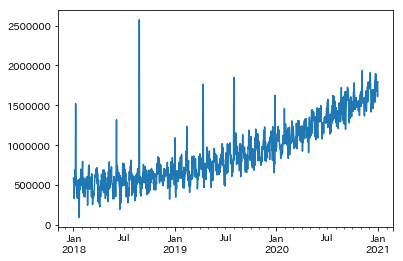

In [3]:
# 乱数を固定
rand = np.random.RandomState(seed=20)

# データを生成
idx = pd.date_range(start='2018-01-01', end='2020-12-31', freq='D')
x = np.arange(len(idx))
y = 500000 \
    + x ** 2 \
    + np.sin(x/4) * 100000 \
    + rand.randn(len(x)) * 100000 \
    + rand.gamma(0.01, 1000000, len(x))

# Series に変換
ts = pd.Series(y, index=idx)

# 描画
ts.plot()

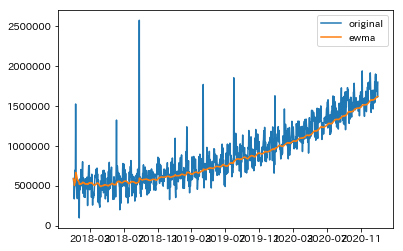

In [4]:
ewm_mean = ts.ewm(span=90).mean()  # 指数加重移動平均

fig, ax = plt.subplots()
ax.plot(ts, label='original')
ax.plot(ewm_mean, label='ewma')
ax.legend()

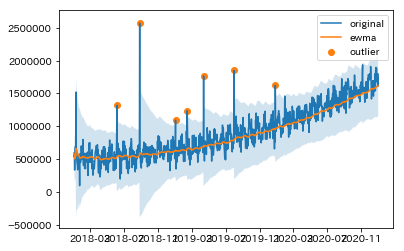

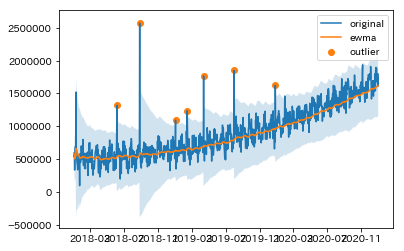

In [5]:
def plot_outlier(ts, ewm_span=90, threshold=3.0):
    assert type(ts) == pd.Series
    fig, ax = plt.subplots()

    ewm_mean = ts.ewm(span=ewm_span).mean()  # 指数加重移動平均
    ewm_std = ts.ewm(span=ewm_span).std()  # 指数加重移動標準偏差
    ax.plot(ts, label='original')
    ax.plot(ewm_mean, label='ewma')

    # 標準偏差から 3.0 倍以上外れているデータを外れ値としてプロットする
    ax.fill_between(ts.index,
                    ewm_mean - ewm_std * threshold,
                    ewm_mean + ewm_std * threshold,
                    alpha=0.2)
    outlier = ts[(ts - ewm_mean).abs() > ewm_std * threshold]
    ax.scatter(outlier.index, outlier, label='outlier')

    ax.legend()
    return fig


plot_outlier(ts)